<a href="https://colab.research.google.com/github/Saksham-Pratap-Singh/ml-california-house-prediction/blob/main/CaliforniaHousePredictionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()

In [5]:
data=pd.DataFrame(california.data,columns=california.feature_names)

data['Price']=california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#EDA
print("Dataset Shape",data.shape)
print("\nDataset Columns", data.columns)
print("\nMissing Values",data.isnull().sum())

data.describe()

Dataset Shape (20640, 9)

Dataset Columns Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

Missing Values MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
#Training Data
X=data.drop('Price',axis=1) #axis=1 is used for droping column

#Testing Data
y=data['Price']


In [9]:
from sklearn.model_selection import train_test_split

#Spliting Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#Training Model
model.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(X_test)

In [12]:
#Evaluation of model

from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


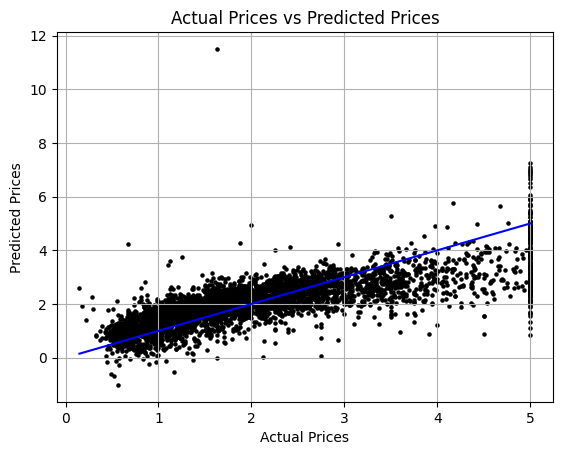

In [13]:
#Visualization of predicted model
plt.scatter(y_test,y_pred,color="black",s=5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.grid(True)
plt.show()

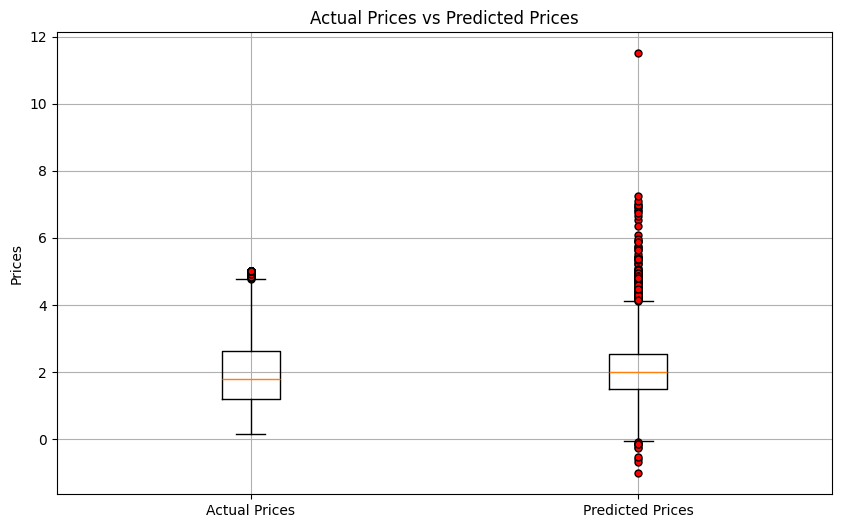

In [14]:
#Seeing variation of predicted values and outliers
data=[y_test,y_pred]
labels=["Actual Prices","Predicted Prices"]
plt.figure(figsize=(10,6))

#Usage of boxplot
plt.boxplot(data,tick_labels=labels,flierprops=dict(markerfacecolor='red',markersize=5))
plt.ylabel("Prices")
plt.title("Actual Prices vs Predicted Prices")

plt.grid(True)
plt.show()

## 📊 Insight: Actual Prices vs Predicted Prices

This box plot visualizes the distribution of **actual prices** versus **predicted prices** from a regression model. It serves as a diagnostic tool to assess the model's performance and highlight discrepancies.

### 🔍 Key Observations

- **Median Alignment**:  
  Both actual and predicted prices have a median around **2**, indicating that the central tendency of the model's predictions aligns well with the true values.

- **Interquartile Range (IQR)**:  
  - Actual Prices: IQR spans from **~1 to ~3**  
  - Predicted Prices: IQR also spans from **~1 to ~3**  
  This suggests that the spread of the middle 50% of values is consistent between actual and predicted data.

- **Whiskers and Range**:  
  - Both plots show whiskers extending from **~0 to ~4**, capturing the bulk of the data.  
  - However, the predicted prices exhibit **more extreme outliers**, with values reaching up to **~11**, unlike the actual prices which have fewer and less extreme outliers.

### ⚠️ Model Implications

- The presence of **numerous high outliers** in the predicted prices indicates that the model may be **overestimating** in certain cases.
- This could be due to:
  - Overfitting to specific training examples
  - Skewed feature distributions
  - Lack of regularization or poor hyperparameter tuning

### ✅ Next Steps

- Investigate the high outliers: Are they tied to specific features or data segments?
- Consider applying:
  - **Robust regression techniques**
  - **Feature scaling or transformation**
  - **Outlier handling strategies** (e.g., winsorization or trimming)
- Re-evaluate model assumptions and retrain with adjusted parameters if needed.

---

📌 *This visual comparison is crucial for understanding not just accuracy metrics, but the distributional behavior of your model's predictions.*

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
#Again fitting model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [17]:
# Predictions on testing data
y_pred = model.predict(X_test_scaled)

# Calculate errors and score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.5558915986952442
R2 Score: 0.575787706032451


## 🔄  Improving Predictions

- **Current Model**: Struggles with outliers and generalization.
- **Feature Scaling Done** ✅ — but no major gains.

### 🧠 Next Move: Try Alternative Algorithms
- **Random Forest** 🌳: Handles non-linearity, robust to outliers.
- **SVR** 📈: Good for regression with scaled features.

In [18]:
#Importing Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)

rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R2 Score: {r2_rf}")


Random Forest Model Evaluation:
Mean Squared Error: 0.255169737347244
R2 Score: 0.8052747336256919


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

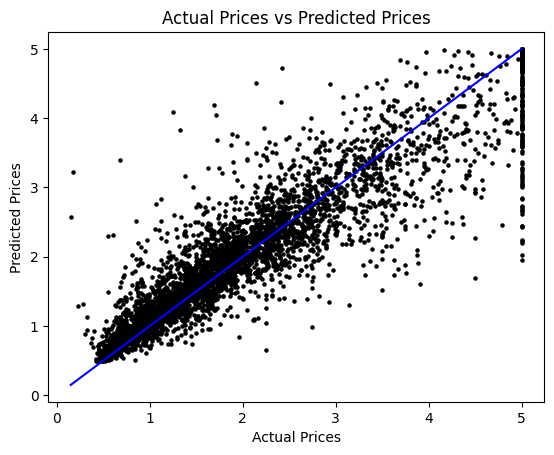

In [20]:
plt.scatter(y_test,y_pred_rf,s=5,color="black")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

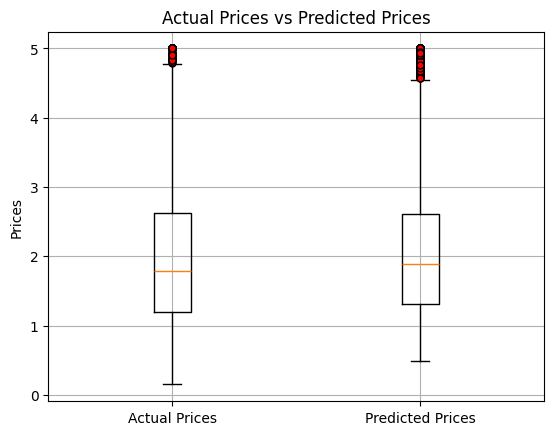

In [21]:
data=[y_test,y_pred_rf]
labels=["Actual Prices","Predicted Prices"]

plt.boxplot(data,tick_labels=labels,flierprops=dict(markerfacecolor='red',markersize=5))
plt.ylabel("Prices")
plt.title("Actual Prices vs Predicted Prices")

plt.grid(True)
plt.show()

##Insights:

Linear Regression just draws one straight line through data. Random Forest uses many decision trees to learn patterns from the data and combine their results, so it's more flexible and accurate — especially for real-world messy data like house prices. Switching to Random Forest significantly improved prediction quality. The predicted prices now follow the actual distribution closely, with fewer outliers and better overall accuracy.

In [22]:
# Display actual vs predicted prices for a few samples
comparison_df = pd.DataFrame({'Actual Prices': y_test.head(), 'Predicted Prices': y_pred_rf[:5]})
print("Comparison of Actual and Predicted Prices (first 5 samples):")
display(comparison_df)

Comparison of Actual and Predicted Prices (first 5 samples):


,Actual Prices,Predicted Prices
20046,0.47700,0.509500
3024,0.45800,0.741610
15663,5.00001,4.923257
20484,2.18600,2.529610
9814,2.78000,2.273690


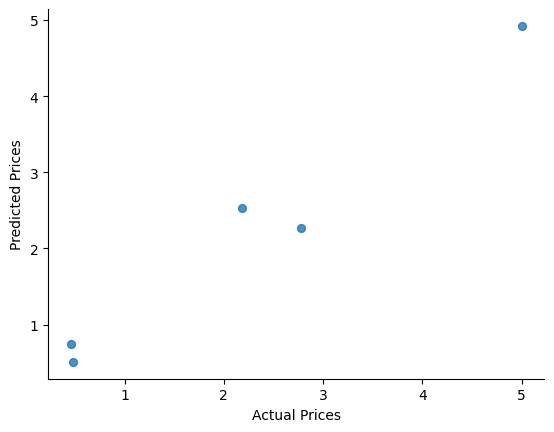

In [23]:
# @title Actual Prices vs Predicted Prices

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='Actual Prices', y='Predicted Prices', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
import numpy as np

# Example input data
input_data = np.array([[3.8462, 52.0, 6.281853, 1.081081, 565.0, 2.181467, 37.85, -122.25]])

# Predict
prediction = rf_model.predict(input_data)

print("Predicted House Price:", prediction[0])


Predicted House Price: 3.5086835999999995


In [26]:
from google.colab import files
files.download('CaliforniaHousePredictionML.ipynb')

FileNotFoundError: Cannot find file: CaliforniaHousePredictionML.ipynb

In [27]:
import os
os.listdir()

['.config', 'drive', 'sample_data']